In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics

# Exercise 1

https://www.kaggle.com/floser/hitters

# Question 1

# Question 1-a

In [2]:
df = pd.read_csv('/content/Hitters.csv')
df_clean=df.dropna()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

# Question 1-b

In [3]:
df_clean[['League', 'Division', 'NewLeague']]

,League,Division,NewLeague
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N
5,A,W,A
...,...,...,...
317,N,E,N
318,A,E,A
319,A,W,A
320,A,E,A


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [4]:
dummies = pd.get_dummies(df_clean[['League', 'Division', 'NewLeague']])
dummies

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


# Question 1-c

In [6]:
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint8  
 17  Division_W   263 non-null    uint8  
 18  NewLeague_N  263 non-null    uint8  
dtypes: float

In [ ]:
y = df_clean.Salary

In [ ]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Question 2

In [ ]:
OLS = LinearRegression()
OLS.fit(X_train, y_train)             # Fit a ridge regression on the training data
print(pd.Series(OLS.coef_, index = X.columns))

AtBat           -1.821115
Hits             4.259156
HmRun           -4.773401
Runs            -0.038760
RBI              3.984578
Walks            3.470126
Years            9.498236
CAtBat          -0.605129
CHits            2.174979
CHmRun           2.979306
CRuns            0.266356
CRBI            -0.598456
CWalks           0.171383
PutOuts          0.421063
Assists          0.464379
Errors          -6.024576
League_N       133.743163
Division_W    -113.743875
NewLeague_N    -81.927763
dtype: float64


In [ ]:
y_pred_OLS = OLS.predict(X_test)           # Use this model to predict the test data
print(metrics.r2_score(y_test, y_pred_OLS))          # Calculate the test MSE

0.3247906027195625


# Question 3

# Question 3-a

In [ ]:
ridge = Ridge(alpha = 4, normalize = True)
ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data           
print(pd.Series(ridge.coef_, index = X.columns)) # Print coefficients

AtBat           0.098658
Hits            0.446094
HmRun           1.412107
Runs            0.660773
RBI             0.843403
Walks           1.008473
Years           2.779882
CAtBat          0.008244
CHits           0.034149
CHmRun          0.268634
CRuns           0.070407
CRBI            0.070060
CWalks          0.082795
PutOuts         0.104747
Assists        -0.003739
Errors          0.268363
League_N        4.241051
Division_W    -30.768885
NewLeague_N     4.123474
dtype: float64


In [ ]:
y_pred_RIDGE = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_pred_RIDGE))

0.38539629724322944


# Question 3-b

In [ ]:
ridge2 = Ridge(alpha = 20, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients

AtBat          0.047039
Hits           0.174079
HmRun          0.723286
Runs           0.282359
RBI            0.345532
Walks          0.371403
Years          1.367347
CAtBat         0.003751
CHits          0.014401
CHmRun         0.107976
CRuns          0.029719
CRBI           0.028400
CWalks         0.035523
PutOuts        0.030653
Assists       -0.000707
Errors         0.097035
League_N      -0.153569
Division_W    -7.408247
NewLeague_N   -0.012163
dtype: float64


In [ ]:
y_pred_RIDGE2 = ridge2.predict(X_test) 
print(metrics.r2_score(y_test, y_pred_RIDGE2))

0.21002571280100724


# Question 3-c

In [ ]:
exponent=np.linspace(-3,4,100)
exponent

array([-3.        , -2.92929293, -2.85858586, -2.78787879, -2.71717172,
       -2.64646465, -2.57575758, -2.50505051, -2.43434343, -2.36363636,
       -2.29292929, -2.22222222, -2.15151515, -2.08080808, -2.01010101,
       -1.93939394, -1.86868687, -1.7979798 , -1.72727273, -1.65656566,
       -1.58585859, -1.51515152, -1.44444444, -1.37373737, -1.3030303 ,
       -1.23232323, -1.16161616, -1.09090909, -1.02020202, -0.94949495,
       -0.87878788, -0.80808081, -0.73737374, -0.66666667, -0.5959596 ,
       -0.52525253, -0.45454545, -0.38383838, -0.31313131, -0.24242424,
       -0.17171717, -0.1010101 , -0.03030303,  0.04040404,  0.11111111,
        0.18181818,  0.25252525,  0.32323232,  0.39393939,  0.46464646,
        0.53535354,  0.60606061,  0.67676768,  0.74747475,  0.81818182,
        0.88888889,  0.95959596,  1.03030303,  1.1010101 ,  1.17171717,
        1.24242424,  1.31313131,  1.38383838,  1.45454545,  1.52525253,
        1.5959596 ,  1.66666667,  1.73737374,  1.80808081,  1.87

In [ ]:
alphas = 10**exponent*0.5
alphas

array([5.00000000e-04, 5.88405976e-04, 6.92443186e-04, 8.14875417e-04,
       9.58955131e-04, 1.12850986e-03, 1.32804389e-03, 1.56285792e-03,
       1.83918989e-03, 2.16438064e-03, 2.54706901e-03, 2.99742125e-03,
       3.52740116e-03, 4.15108784e-03, 4.88504979e-03, 5.74878498e-03,
       6.76523887e-03, 7.96141397e-03, 9.36908711e-03, 1.10256537e-02,
       1.29751211e-02, 1.52692775e-02, 1.79690683e-02, 2.11462144e-02,
       2.48851178e-02, 2.92851041e-02, 3.44630605e-02, 4.05565415e-02,
       4.77274228e-02, 5.61662016e-02, 6.60970574e-02, 7.77838072e-02,
       9.15369140e-02, 1.07721735e-01, 1.26768225e-01, 1.49182362e-01,
       1.75559587e-01, 2.06600620e-01, 2.43130079e-01, 2.86118383e-01,
       3.36707533e-01, 3.96241449e-01, 4.66301673e-01, 5.48749383e-01,
       6.45774833e-01, 7.59955541e-01, 8.94324765e-01, 1.05245207e+00,
       1.23853818e+00, 1.45752653e+00, 1.71523464e+00, 2.01850863e+00,
       2.37540508e+00, 2.79540509e+00, 3.28966612e+00, 3.87131841e+00,
      

In [ ]:
ridge = Ridge(normalize = True)
coefs = []
r2=[]
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    y_pred = ridge.predict(X_test)
    r2.append(metrics.r2_score(y_test, y_pred))

Text(0, 0.5, 'R2')

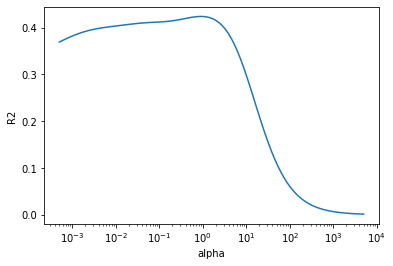

In [ ]:
ax = plt.gca()
ax.plot(alphas, r2)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('R2')

Text(0, 0.5, 'weights')

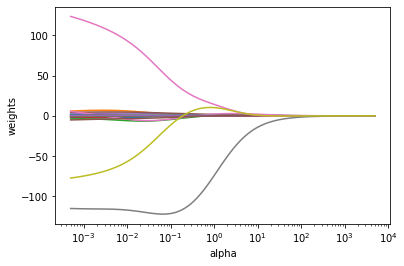

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# Question 4

# Question 4-a

In [ ]:
exponent=np.linspace(-3,1,100)
alphas = 10**exponent*0.5

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
r2=[]
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    y_pred = lasso.predict(X_test)
    r2.append(metrics.r2_score(y_test, y_pred))
    


Text(0, 0.5, 'R2')

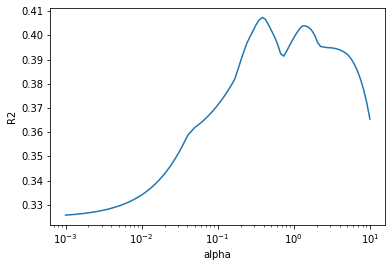

In [ ]:
ax = plt.gca()
ax.plot(alphas*2, r2)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('R2')

Text(0, 0.5, 'weights')

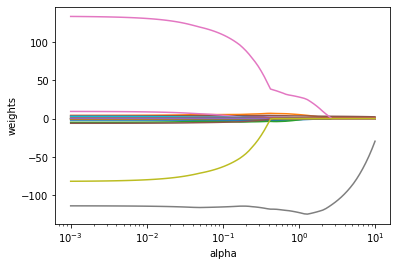

In [ ]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# Question 4-b

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
metrics.r2_score(y_test, lasso.predict(X_test))

0.3926631381226262

In [ ]:
lassocv.alpha_

2.402973015740077

# Exercise 2

https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Question 1

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv('/home/marianne/Desktop/Enseignement/data/diabetes.csv')
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Question 2

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [ ]:
X

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Question 3

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

/home/marianne/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Question 4

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


# Question 5

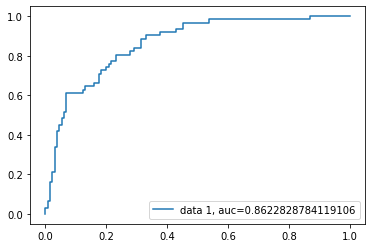

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Question 6

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred2=pipe.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.8072916666666666
Precision: 0.7551020408163265
Recall: 0.5967741935483871


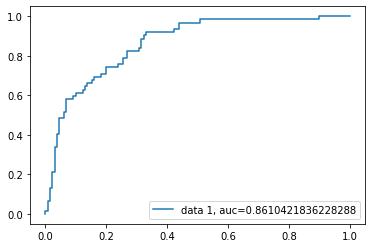

In [ ]:
y_pred_proba2 = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()